In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Dataset/200k

/content/drive/MyDrive/Dataset/200k


In [ ]:
from transformers import MarianTokenizer, MarianMTModel, pipeline

In [ ]:
pip install gradio

In [ ]:
# Load mô hình và tokenizer từ thư mục đã lưu
model_path = "./marian_finetuned_vi_final"
tokenizer = MarianTokenizer.from_pretrained(model_path)
model = MarianMTModel.from_pretrained(model_path)

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:177: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
translator = pipeline("translation", model=model, tokenizer=tokenizer, device=0)  # device=0 để dùng GPU

Device set to use cpu


In [ ]:
# Hàm dịch đơn giản
def translate_text(text):
    result = translator(text)
    return result[0]["translation_text"]

# Thử nghiệm
input_text = "With all the legitimate concerns about AIDS and avian flu -- and we'll hear about that from the brilliant Dr. Brilliant later today -- I want to talk about the other pandemic, which is cardiovascular disease, diabetes, hypertension -- all of which are completely preventable for at least 95 percent of people just by changing diet and lifestyle."
translated_text = translate_text(input_text)
print(f"Input: {input_text}")
print(f"Translated: {translated_text}")

Input: With all the legitimate concerns about AIDS and avian flu -- and we'll hear about that from the brilliant Dr. Brilliant later today -- I want to talk about the other pandemic, which is cardiovascular disease, diabetes, hypertension -- all of which are completely preventable for at least 95 percent of people just by changing diet and lifestyle.
Translated: với tất cả những mối quan tâm chính đáng về bệnh sốt rét và cúm avian chúng ta sẽ nghe về điều này từ một tiến sĩ tài giỏi nổi tiếng sáng dạ hôm nay tôi muốn nói về một đại dịch khác đó là bệnh tim mạch tiểu đường bệnh tiểu đường tăng huyết áp tất cả đều có thể ngăn ngừa được 95 chỉ bằng cách thay đổi chế độ ăn và lối sống


In [ ]:
import gradio as gr
from transformers import MarianTokenizer, MarianMTModel, pipeline

# Load mô hình và tokenizer
model_path = "./marian_finetuned_vi_final"
tokenizer = MarianTokenizer.from_pretrained(model_path)
model = MarianMTModel.from_pretrained(model_path)

# Tạo pipeline dịch
translator = pipeline(
    "translation",
    model=model,
    tokenizer=tokenizer,
    device=0,
    max_length=256,
    max_new_tokens=256,
    min_length=10,  # Đảm bảo output không quá ngắn
    num_beams=5,  # Beam search để cải thiện chất lượng
    no_repeat_ngram_size=2,  # Tránh lặp từ
)

def translate_text(input_text):
    if not input_text.strip():
        return "Vui lòng nhập văn bản!"
    try:
        result = translator(input_text)[0]["translation_text"]
        return result
    except Exception as e:
        return f"Lỗi: {str(e)}"

# Tạo giao diện Gradio
with gr.Blocks() as demo:
    gr.Markdown("# Ứng Dụng Dịch Anh - Việt")
    input_box = gr.Textbox(label="Nhập câu tiếng Anh", placeholder="Ví dụ: Hello world")
    output_box = gr.Textbox(label="Kết quả tiếng Việt")
    translate_button = gr.Button("Dịch")
    translate_button.click(
        fn=translate_text,
        inputs=input_box,
        outputs=output_box
    )

# Chạy ứng dụng
demo.launch(server_name="0.0.0.0", server_port=7864)

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:177: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8f671d8889bc60f863.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


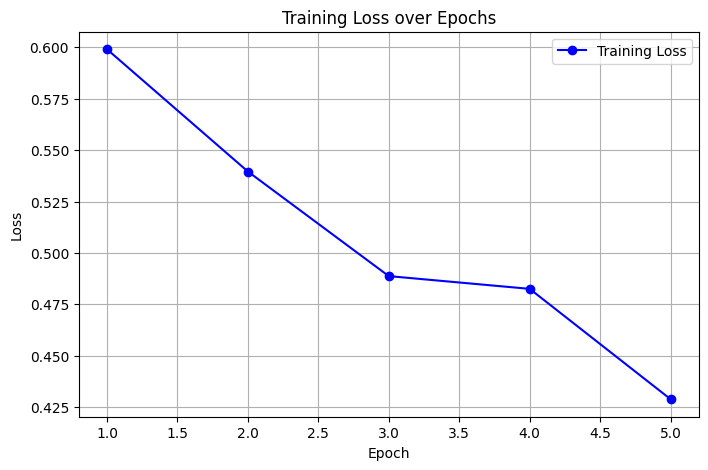

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu
epochs = [1, 2, 3, 4, 5]
train_loss = [0.599100, 0.539600, 0.488700, 0.482500, 0.428800]

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss', marker='o', color='blue')

# Định dạng biểu đồ
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

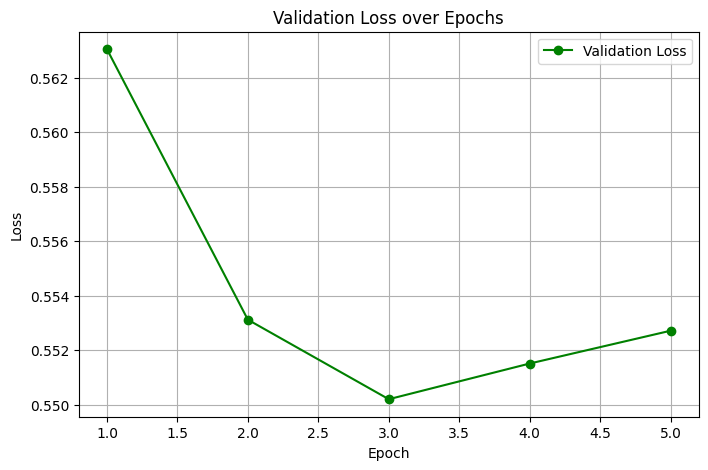

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu
epochs = [1, 2, 3, 4, 5]
val_loss = [0.563040, 0.553121, 0.550205, 0.551514, 0.552717]

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', color='green')

# Định dạng biểu đồ
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

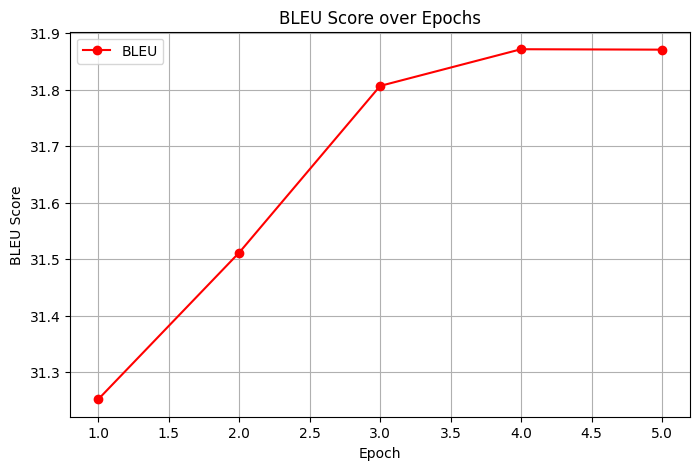

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu
epochs = [1, 2, 3, 4, 5]
bleu = [31.251861, 31.511484, 31.806467, 31.871430, 31.870667]

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(epochs, bleu, label='BLEU', marker='o', color='red')

# Định dạng biểu đồ
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
plt.title('BLEU Score over Epochs')
plt.legend()
plt.grid(True)
plt.show()